In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

100


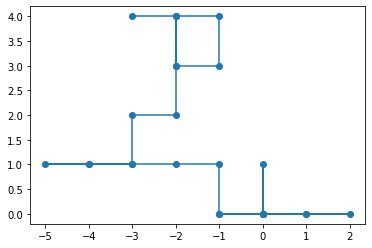

In [57]:
# regular random walk
polymer_length = 25
num_of_configs = 100
# left, forward, right, down
move_indices = np.random.randint(low=0, high=4, size=(num_of_configs, polymer_length))
move_dict = {0: np.array([1,0]), 1: np.array([0,1]),
             2: np.array([-1,0]), 3: np.array([0,-1])}
regular_polymer_configs = []
for sequence in move_indices:
    config = [np.array([0,0])]
    for ind in sequence:
        config.append(config[-1]+move_dict[ind])
    regular_polymer_configs.append(np.vstack(config))

example = regular_polymer_configs[0]
plt.scatter(example[:,0], example[:,1])
plt.plot(example[:,0], example[:,1])

[1, -3]
15
15


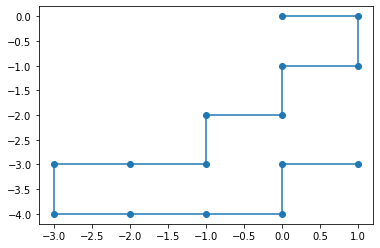

In [117]:
# self-avoiding random walk
polymer_length = 15
num_of_configs = 100
move_dict = {0: np.array([1,0]), 1: np.array([0,1]),
             2: np.array([-1,0]), 3: np.array([0,-1])}
self_avoiding_polymer_configs = []
for _ in range(num_of_configs):
    config = [[0,0]]
    for n in range(polymer_length-1):
        move_choices = np.random.choice([0,1,2,3], size=4, replace=False)
        for choice in move_choices:
            attempt = list(np.array(config[-1]) + move_dict[choice])
            if attempt not in config:
                config.append(attempt)
                break
    self_avoiding_polymer_configs.append(config)
    
example = self_avoiding_polymer_configs[90]
xs = [p[0] for p in example]
ys = [p[1] for p in example]

print(example[-1])
print(len(xs))
print(len(ys))

plt.plot(xs, ys)
plt.scatter(xs, ys)

In [51]:
def plot_polymer_config(config):
    
    with plt.ioff():
        fig, ax = plt.subplots()
    ax.grid()
    # 0 - move left, 1 - move forward, 2 - move right
    move_dict = {0: np.array([1,0]), 1: np.array([0,1]),
                 2: np.array([-1,0]), 3: np.array([0,-1])}
    coords = [np.array([0,0])]
    for ind in config:
        coords.append(coords[-1] + move_dict[ind])
    
    xs = [p[0] for p in coords]
    ys = [p[1] for p in coords]
    ax.scatter(xs, ys)
    ax.plot(xs, ys)
        
    return fig

[0 2 2 3 0 3 0 2 3 1 3 3 0 0 3 2 1 2 2 1 3 2 3 2 0]


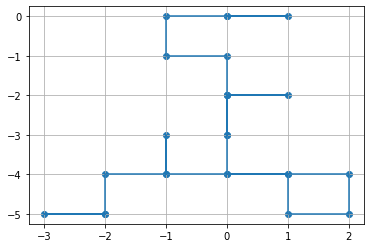

In [52]:
print(move_indices[1])

f = plot_polymer_config(move_indices[1])
plt.show()